In [ ]:
#### Let us start with mounting our drive to be able to use the dataset stored in our dataset.

# Problem:
### The aim is to build an ANN to predict whether the bank's customer will leave the bank or not given the demographic characteristics such as age, gender, salary, credit score, whether they are active or not, etc. We can classify this problem as a demographic segmentation model.

## Customer Churn
The customer churn, also known as customer attrition, refers to the phenomenon whereby a customer leaves an org that they are associated with. Some studies confirmed that acquiring new customers can cost five times more than satisfying and retaining existing customers. As a matter of fact, there are a lot of benefits that encourage the tracking of the customer churn rate, for example:

Marketing costs to acquire new customers are high. Therefore, it is important to retain customers so that the initial investment is not wasted;
It has a direct impact on the ability to expand the company;
etc.

In this project our goal is to predict the probability of a customer likely to churn using ANN.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!pip install tensorflow==2.0

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers


###1. Read the dataset

In [ ]:
project_path = '/content/drive/My Drive/Colab Notebooks/ANN/'

In [ ]:
dataset_file = project_path + 'bank.csv'

In [ ]:
data = pd.read_csv(dataset_file)
#data = pd.read_csv('bank.csv')

In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data.tail(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


###2. Drop the columns which are unique for all users like IDs (5 points)

As we can see the rownumber attribute is just like a counter of records, the customerid attribute is a unique identifier for a given customer and the surname attribute enter also the profiling a customer. So we are going remove them from our dataset they don't give useful information the analysis.

RowID, CustomerID, Surname can be dropped as they are unique for the user. 

Here I am reading the dataset into the Feature set X and variable to be predicted y ('Exited')


In [ ]:
databkup = data.copy()
data.drop(['RowNumber','CustomerId','Surname'], axis=1,inplace= True)
data
databkup

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## EDA - Exploratory Data Analysis

In [ ]:
from __future__ import print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
%matplotlib inline

import itertools
import warnings
warnings.filterwarnings("ignore")
import os
import io
import plotly.offline as py #visualization
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff #visualization

In [ ]:
data.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [ ]:
#Separating churn and non churn customers
churn     = data[data["Exited"] == 1]
not_churn = data[data["Exited"] == 0]
churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1


## Data overview
CreditScore: the range of credit score is from 350 to 850

Geography: the regional bank has customers from three countries: France, Germany and Spain

Age: the range of customer’s age is from 18 to 92

Tenure: years that the customer has stayed with the bank

Balance: the amount of money available for withdrawal

NumOfProducts: number of products that the customers use in the bank

IsActiveMember: 1 indicates is active

EstimatedSalary: customer’s self-reported annual salary

Exited: whether the customer has churned (closed the bank account), 1 indicates churn.

## Response Variable
Exited = 0 non-churned customer

Exited = 1 churned customer

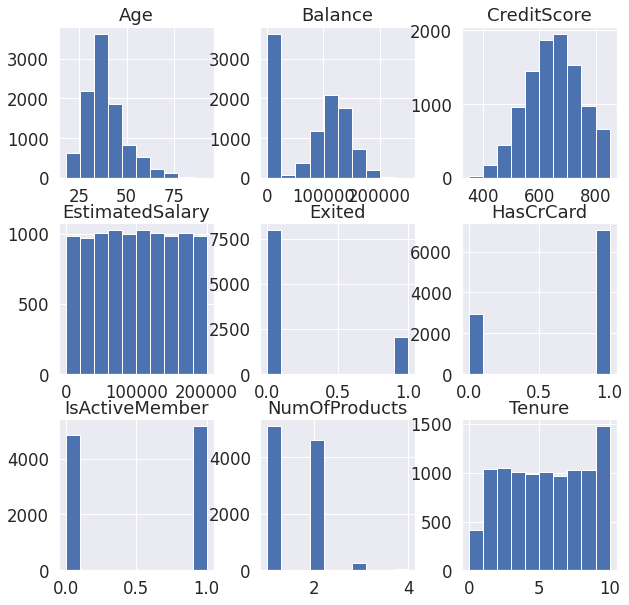

In [ ]:
data.hist(figsize=(10,10));

## Information we can get from the plots:
1. Age is a bit right-skewed
2. Balance is fairly normal distributed
3. Most credit scores are above 600, it is possible that high quality customers will churn
4. We have more male customers than females.
5. Customers are from France (most), Germany and France.
6. Most of the customers have the bank’s credit card
7. We have an almost equal number of active and non-active members, not a very good sign
8. Most of the customers use one or two kinds of products, with a very few use three or four products
9. Almost equal number of customers in different tenure groups, except 0 and 10.

### 5 point summary

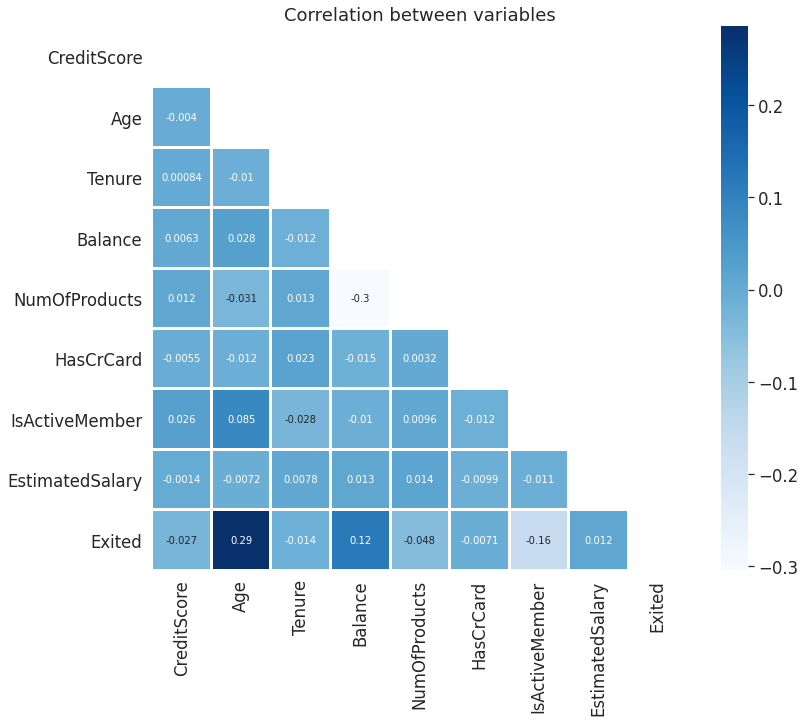

In [ ]:
corr = data.corr() 
#sns.heatmap(corr, annot=True, cmap='Blues')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,10))

with sns.axes_style("white"):
#    sns.heatmap(corr, annot=True, cmap='Blues')
    sns.heatmap(corr,annot=True,linewidth=2,mask=mask,cmap="Blues")
plt.title("Correlation between variables")
plt.show()


1. I don’t see any high correlation between the continuous variables (i.e. no multicollinearity). So I’ll keep all this continuous variables.
2. Balance attribute is negatively correlated with numberofproducts attribute. It means one attribute increases as the other decreases, and vice versa.Overall none of the independent variables have high correlation.

Age and exit; Balance & # of Products appears to have some correlation - rest of the independent variables have little or no correlation

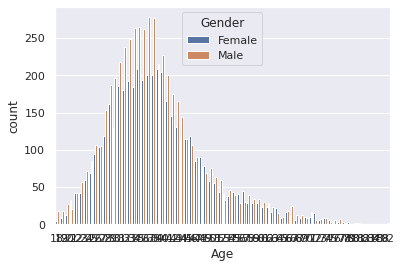

In [ ]:
sns.distplot(data['Age'], kde=False, hist_kws={"alpha": 1}, bins=data['Age'].nunique())
plt.xlabel('Age [years]')
plt.ylabel('Number of People')

%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x='Age', hue="Gender", data=data)
plt.show()


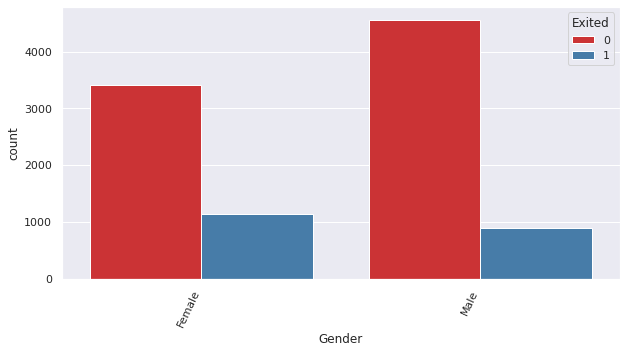

In [ ]:
#create count plot for gender,exit
%matplotlib inline
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=data,
    x='Gender',hue ='Exited',
    palette='Set1'
)
plt.xticks(rotation=65, horizontalalignment='right');
# More men exited compared to women

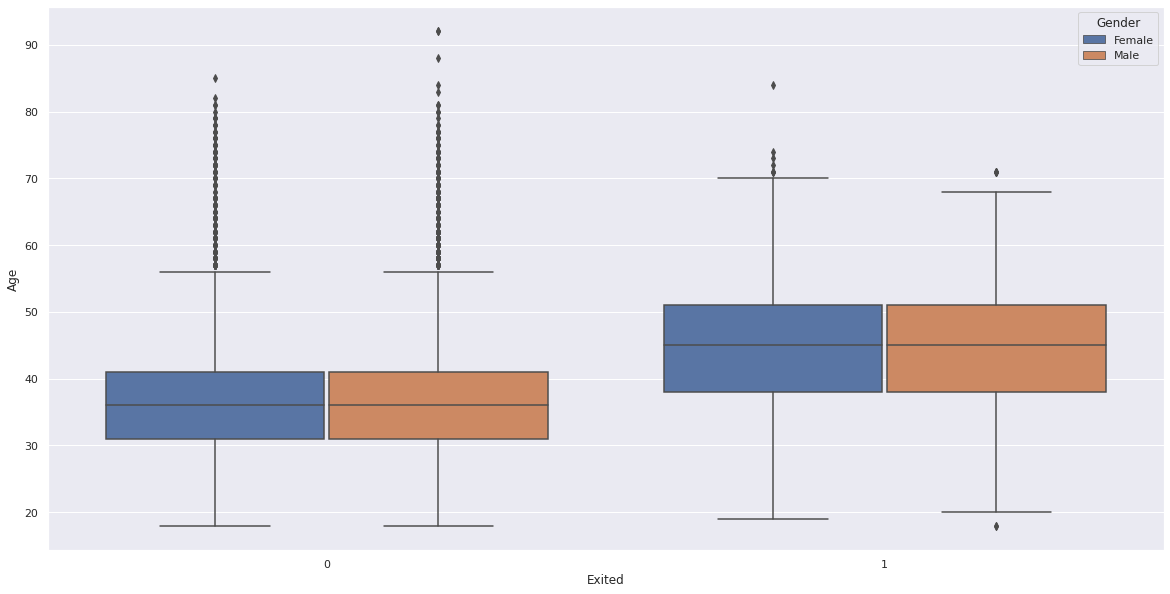

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Exited',y='Age',hue='Gender',data=data)

Non-churned customers have a right-skewed distribution (tend to be young). Outliers above 60 years old maybe our stable customers.

Churned customers are mostly around 40 to 50. They might need to switch to other banking service for retirement purpose or whole family issue.

We can see very clear difference between this two groups.

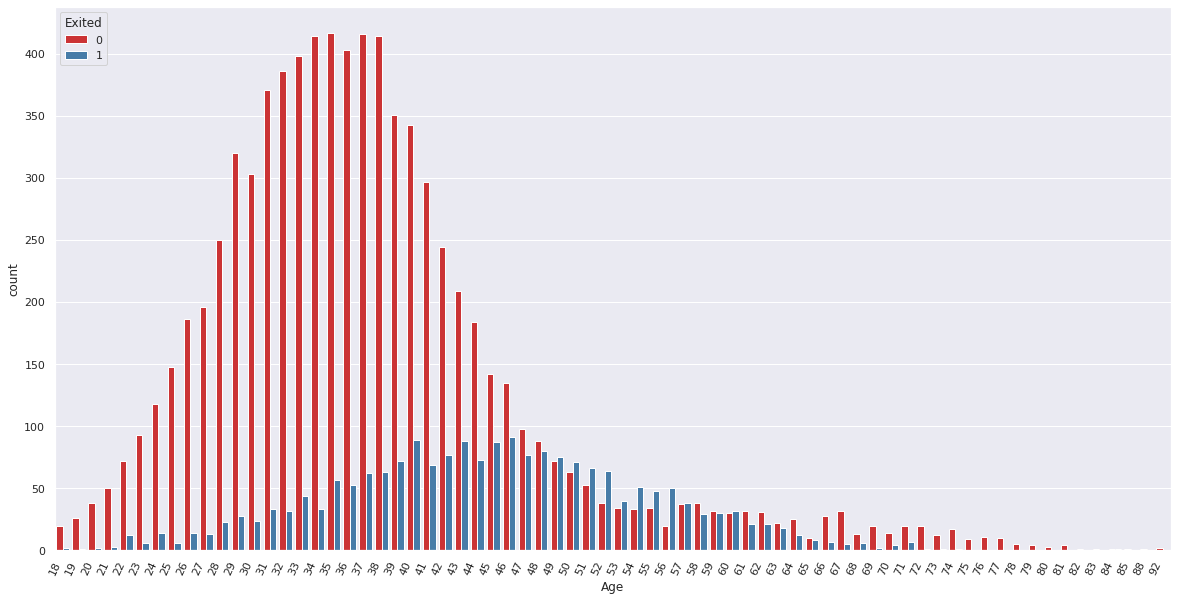

In [ ]:
#create count plot for Tenure by Geography where customers exited. 
%matplotlib inline
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
chart = sns.countplot(
    data=data,
    x='Age',hue ='Exited',
    palette='Set1'
)
plt.xticks(rotation=65, horizontalalignment='right');

The graph above shows us that the customers with age of 46 are the most churned.

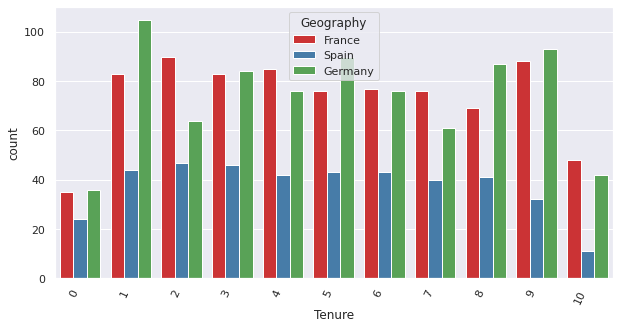

In [ ]:
#create count plot for Tenure by Geography where customers exited. 
%matplotlib inline
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=churn,
    x='Tenure',hue ='Geography',
    palette='Set1'
)
plt.xticks(rotation=65, horizontalalignment='right');


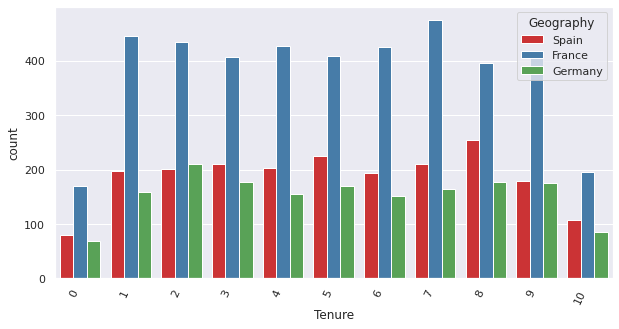

In [ ]:
#create count plot for Tenure by Geography where customers exited. 
%matplotlib inline
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=not_churn,
    x='Tenure',hue ='Geography',
    palette='Set1'
)
plt.xticks(rotation=65, horizontalalignment='right');

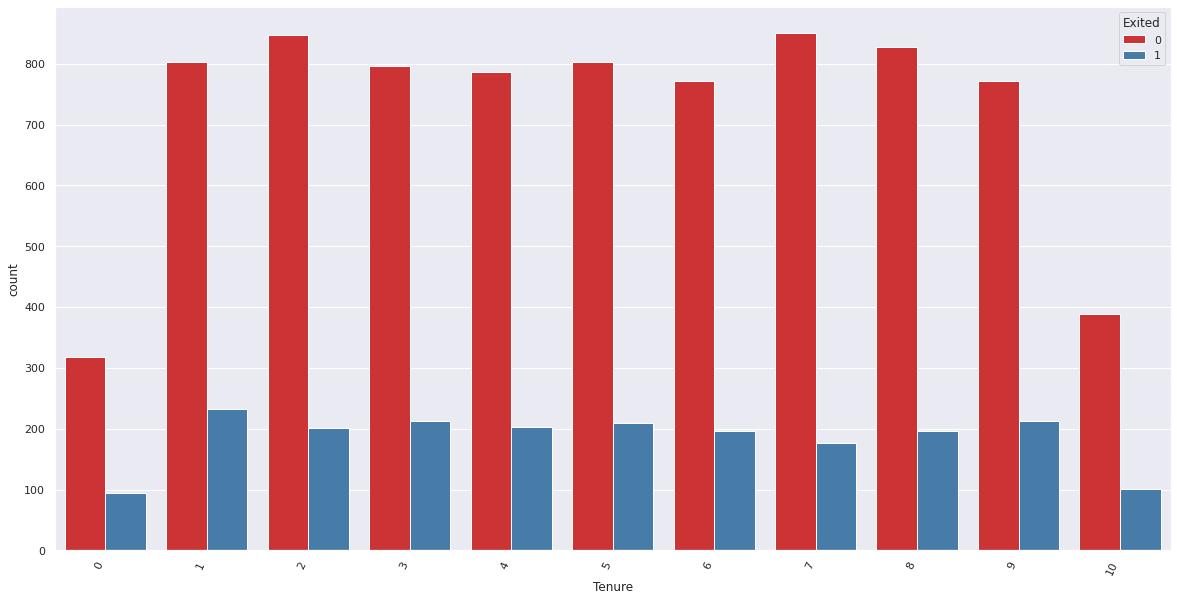

In [ ]:
#create count plot for Tenure by Geography where customers exited. 
%matplotlib inline
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
chart = sns.countplot(
    data=data,
    x='Tenure',hue ='Exited',
    palette='Set1'
)
plt.xticks(rotation=65, horizontalalignment='right');

It shows us that the customers who have been with the bank just for one month are the most churned.

In [ ]:
cbin_edges = [200, 300, 400, 500, 600, 700,800,900]
cbin_names = ['200','300', '400', '500', '600','700','800']
data['c_bins'] = pd.cut(data['CreditScore'], cbin_edges, labels=cbin_names)

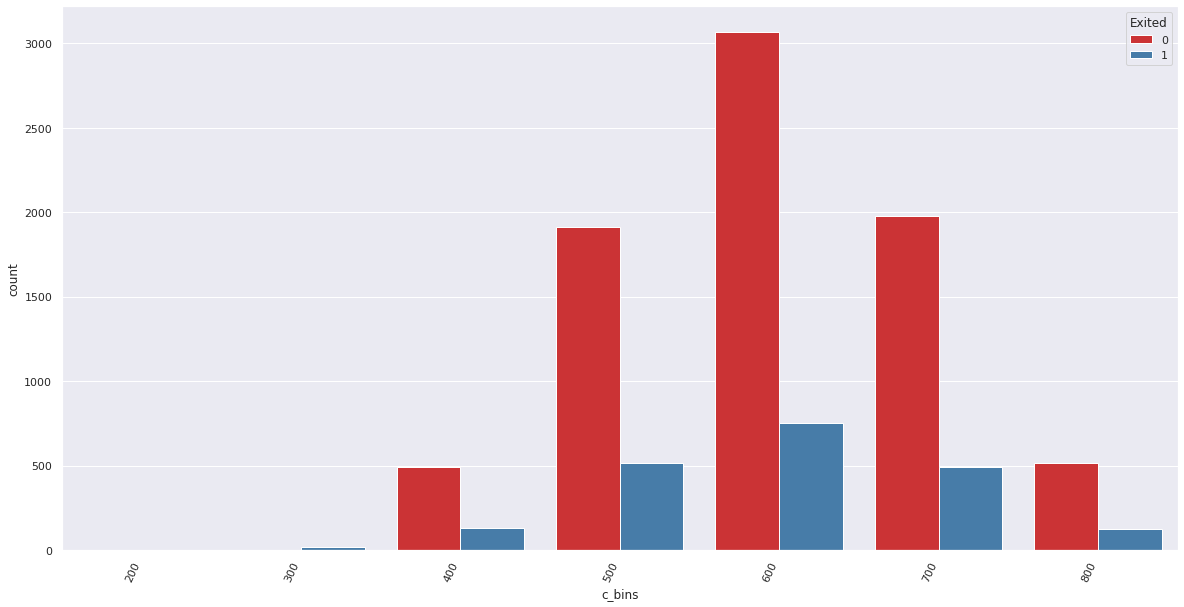

In [ ]:
#create count plot for Tenure by Geography where customers exited. 
%matplotlib inline
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
chart = sns.countplot(
    data=data,
    x='c_bins',hue ='Exited',
    palette='Set1'
)
plt.xticks(rotation=65, horizontalalignment='right');

Maximum number of customers who exited the bank had a credit score between 600-700

In [ ]:

bin_edges = [25000, 50000, 100000, 150000, 200000, 250000]
bin_names = ['25k','50k', '100k', '150k', '200k']
data['balance_bins'] = pd.cut(data['Balance'], bin_edges, labels=bin_names)


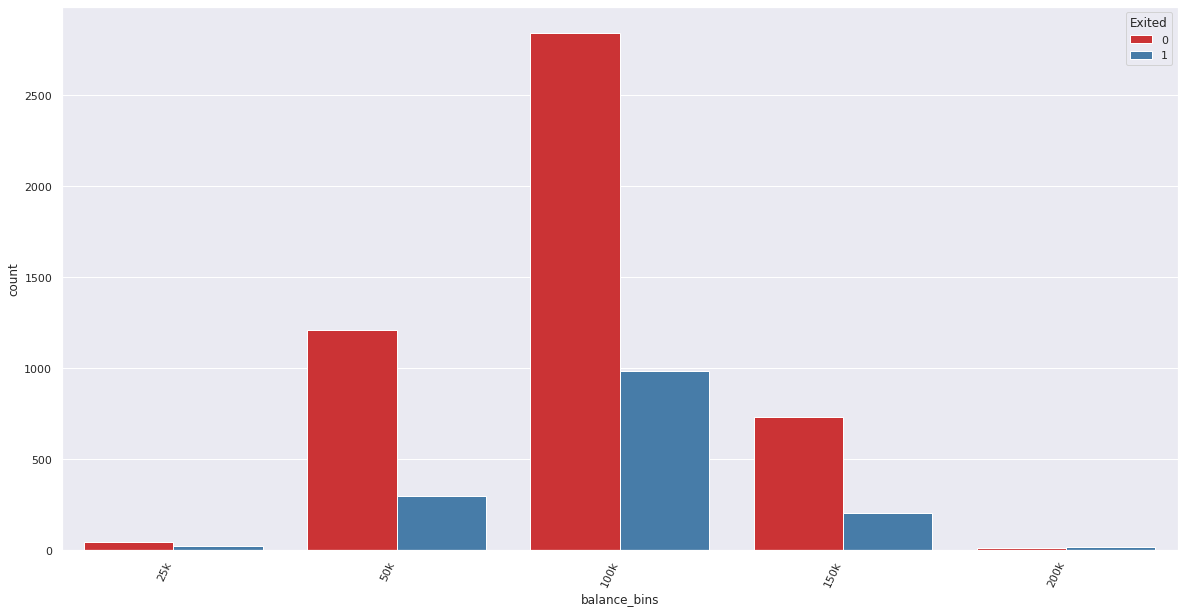

In [ ]:
#create count plot for Tenure by Geography where customers exited. 
%matplotlib inline
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
chart = sns.countplot(
    data=data,
    x='balance_bins',hue ='Exited',
    palette='Set1'
)
plt.xticks(rotation=65, horizontalalignment='right');

Customers with a balance ~100k have had the max attrition

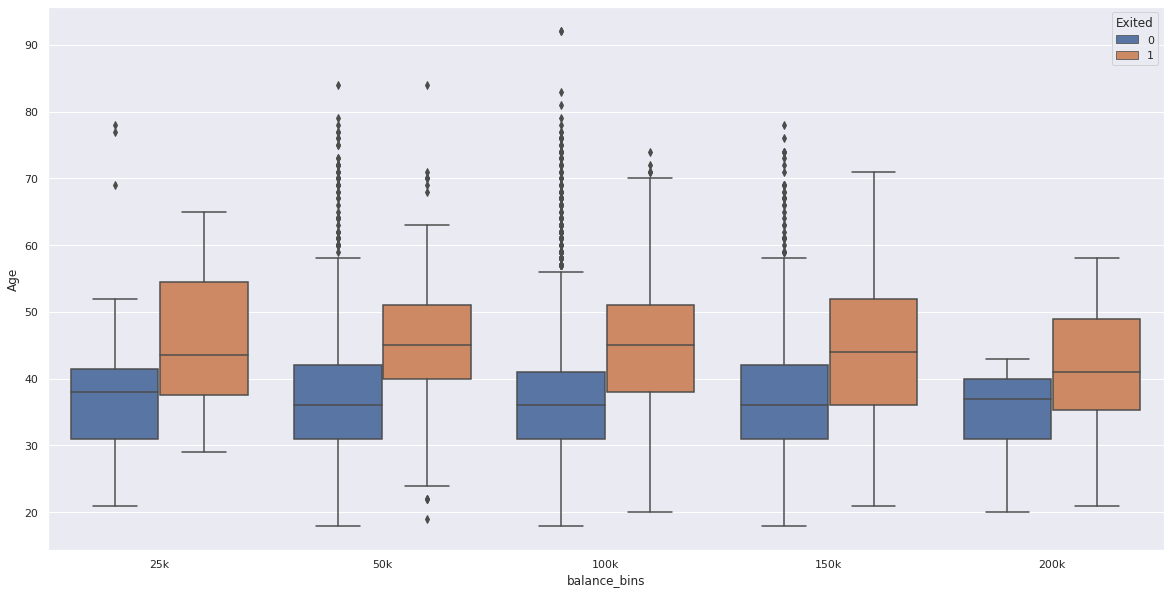

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='balance_bins',y='Age',hue='Exited',data=data)


We can see the distribution of these two groups churned and non-churned are quite similar.

Surprisingly some non-churned customers have lower balance than churned customers.

In [ ]:
data['salary_bins'] = pd.cut(data['EstimatedSalary'], bin_edges, labels=bin_names)

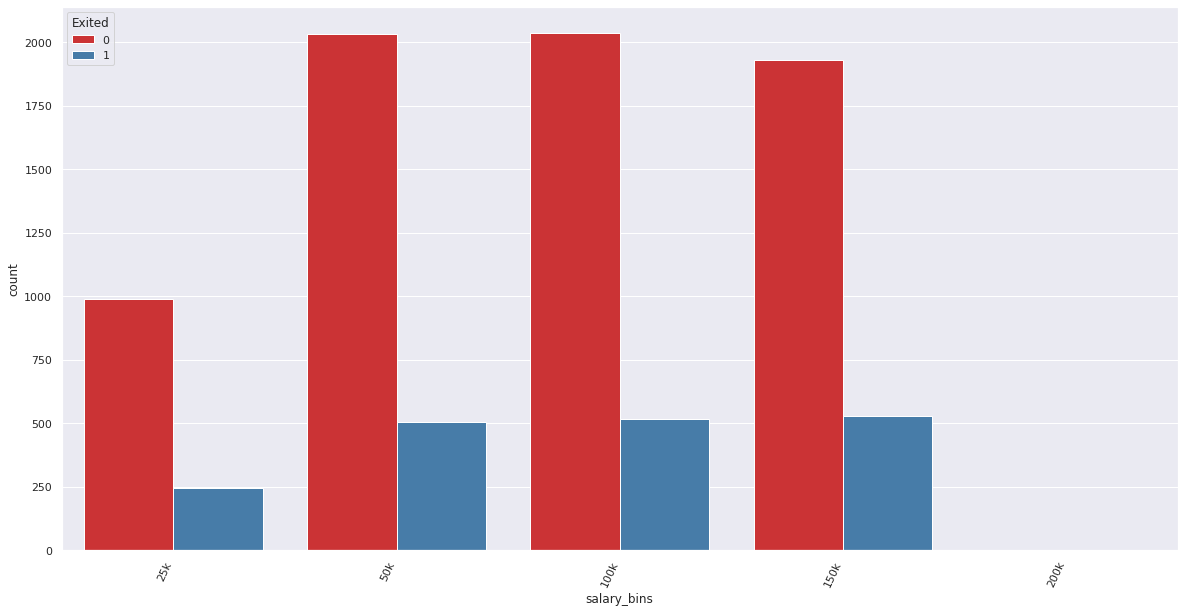

In [ ]:
#create count plot for Tenure by Geography where customers exited. 
%matplotlib inline
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
chart = sns.countplot(
    data=data,
    x='salary_bins',hue ='Exited',
    palette='Set1'
)
plt.xticks(rotation=65, horizontalalignment='right');

Customers with a salary 50-150k have higher attrition; those with a salary over 150k have the highest attrition

Both churn/ not-churn groups have a very similar distribution. Esimated Salary might not be a very important infomation to decide if a customer will churn or not.

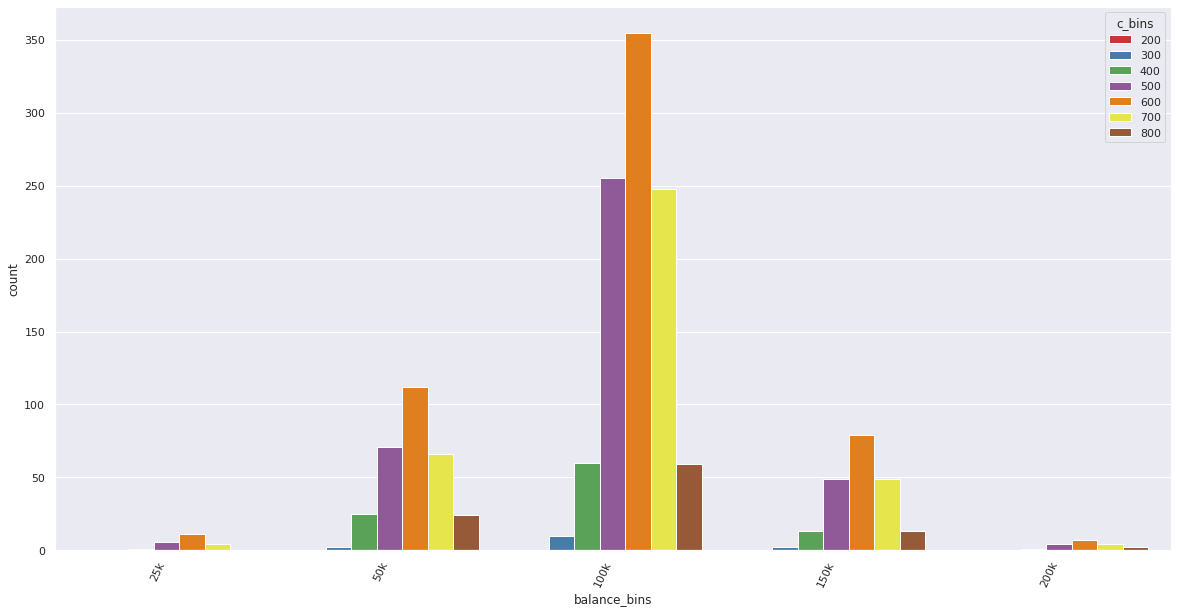

In [ ]:
#create count plot for Tenure by Geography where customers exited. 
%matplotlib inline
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
chart = sns.countplot(
    data=data[data["Exited"] == 1],
    x='balance_bins',hue ='c_bins',
    palette='Set1'
)
plt.xticks(rotation=65, horizontalalignment='right');

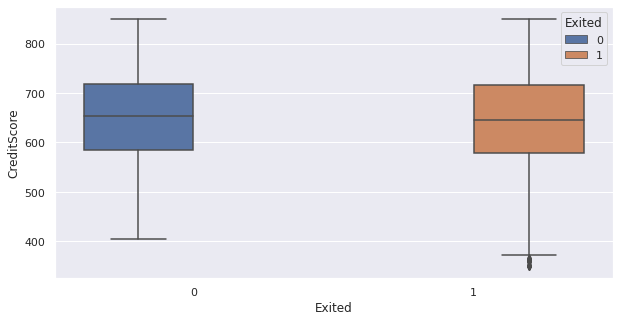

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Exited',y='CreditScore',hue='Exited',data=data)


Overall similar distribution. Some customers with extremely low credit score (on the left tail) as well as with high credit score also churned, it indicates that really low and high quality customer are easily churn than the average quality customer.

Customers with various balances who have exited the most in the graph above have a credit limit between 600-700 - see the orange hue, followed by customers with a credit limit between 500-600 followed by customers with a credit limit between 600-700

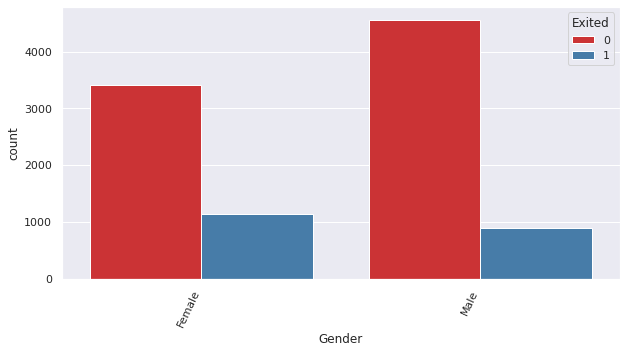

In [ ]:
#create count plot for Tenure by Geography where customers exited. 
%matplotlib inline
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=data,
    x='Gender',hue ='Exited',
    palette='Set1'
)
plt.xticks(rotation=65, horizontalalignment='right');

Female are more likely to churn than male



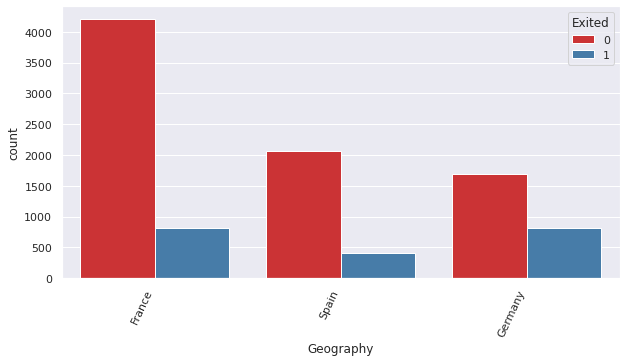

In [ ]:
#create count plot for Churn by Geography where customers exited. 
%matplotlib inline
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=data,
    x='Geography',hue ='Exited',
    palette='Set1'
)
plt.xticks(rotation=65, horizontalalignment='right');

Customers in Germany are more likely to churn than customers in France and Spain



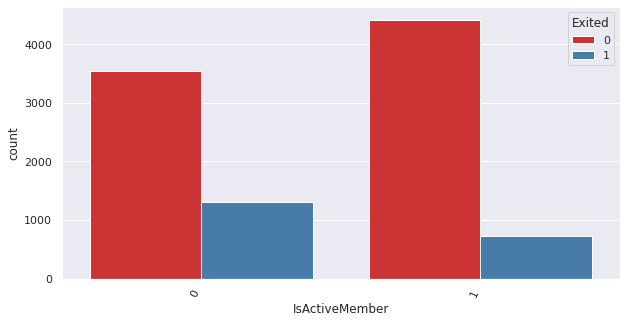

In [ ]:
%matplotlib inline
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=data,
    x='IsActiveMember',hue ='Exited',
    palette='Set1'
)
plt.xticks(rotation=65, horizontalalignment='right');

In-active customers are more likely to churn than active (very reasonable)



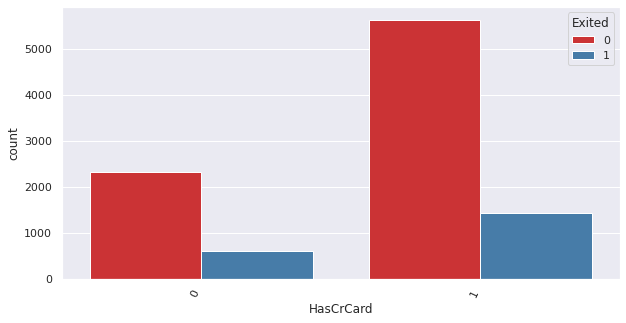

In [ ]:
%matplotlib inline
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=data,
    x='HasCrCard',hue ='Exited',
    palette='Set1'
)
plt.xticks(rotation=65, horizontalalignment='right');

HasCrCard may not be a useful feature as we cannot really tell if a customer has credit card will churn or not, however from the histogram  ~1500  customers that exited had credit cards vs. 500 customers who exited who did not have a credit card. This means the probability of a customer exiting is higher in customers with a credit card. 

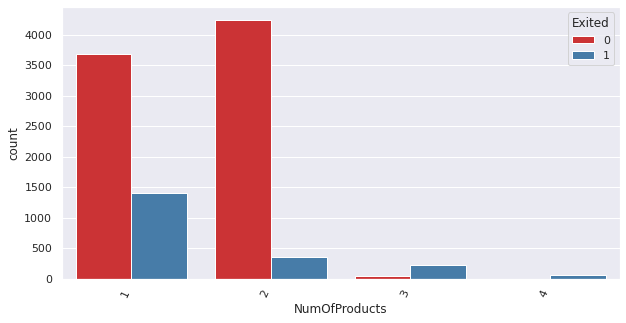

In [ ]:
%matplotlib inline
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=data,
    x='NumOfProducts',hue ='Exited',
    palette='Set1'
)
plt.xticks(rotation=65, horizontalalignment='right');

Customers who use 1 or 2 product are extremely likely to churn



In [ ]:
data.drop(["salary_bins","balance_bins","c_bins"], axis = 1, inplace = True)


In [ ]:
target_col = ["Exited"]
cat_cols   = data.nunique()[data.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in data.columns if x not in cat_cols + target_col]

In [ ]:
# Percentage of churn customers / exited to dataset = 20.37% of the sample dataset of bank customers have Exited the bank. 
percentage_labels = data['Exited'].value_counts(normalize = True) * 100
percentage_labels

0    79.63
1    20.37
Name: Exited, dtype: float64

In [ ]:
# One-Hot encoding our categorical attributes
list_cat = ['Geography', 'Gender']
data = pd.get_dummies(data, columns = list_cat, prefix = list_cat)

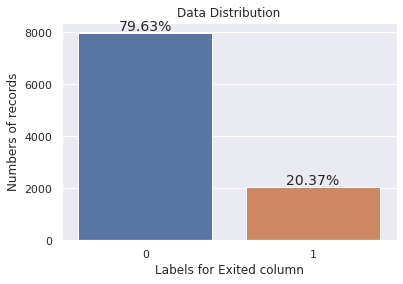

In [ ]:
# Graphical representation of the target label percentage.
total_len = len(data['Exited'])
sns.set()
sns.countplot(data.Exited).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100 * (height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for Exited column")
ax.set_ylabel("Numbers of records")
plt.show()

From this chart, one can see that there are many records with the target label $0$ and fewer records with the target label $1$. One can see that the data records with a $0$ label are about $79.63 \%$, whereas $20.37 \%$ of the data records are labeled $1$. We will use all of these facts in the upcoming sections. For now, we can consider our outcome variable as imbalanced.

In [ ]:
!pip install bioinfokit


In [ ]:
import bioinfokit
bioinfokit.__version__

'0.8.8'

In [ ]:
X = data.drop('Exited', axis=1)
y = data.Exited

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [ ]:
from scipy.stats import chisquare
chisquare(X,ddof=1)

Power_divergenceResult(statistic=array([1.43589738e+05, 2.82574508e+04, 1.66849588e+04, 5.08988896e+08,
       2.21074343e+03, 2.94500000e+03, 4.84900000e+03, 3.30414438e+08,
       4.98600000e+03, 7.49100000e+03, 7.52300000e+03, 5.45700000e+03,
       4.54300000e+03]), pvalue=array([0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.]))

From the pvalue it appears that NumOfProducts, HasCrCard, IsActiveMember, Geography and Gender have a lower feature importance

In [ ]:
# Import the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# We perform training on the Random Forest model and generate the importance of the features
X = data.drop('Exited', axis=1)
y = data.Exited
features_label = X.columns
forest = RandomForestClassifier (n_estimators = 10000, random_state = 0, n_jobs = -1)
forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

 1) CreditScore                    0.239710
 2) Age                            0.146917
 3) Tenure                         0.144480
 4) Balance                        0.141905
 5) NumOfProducts                  0.128330
 6) HasCrCard                      0.083883
 7) IsActiveMember                 0.039977
 8) EstimatedSalary                0.020773
 9) Geography_France               0.018094
10) Geography_Germany              0.009943
11) Geography_Spain                0.008848
12) Gender_Female                  0.008590
13) Gender_Male                    0.008551


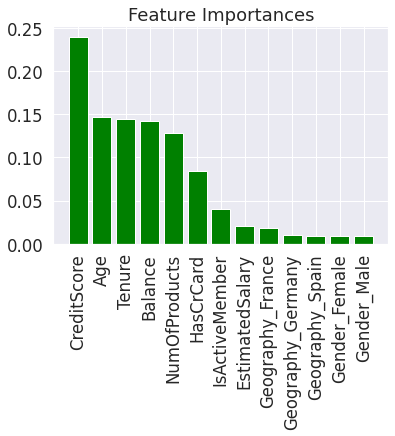

In [ ]:
# Visualization of the Feature importances
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color = "green", align = "center")
plt.xticks(range(X.shape[1]), features_label, rotation = 90)
plt.show()

The graph above shows the features with the highest importance value to the lowest importance value. It shows the most important features are creditscore, age, tenure, balance,  and so on.

###  3. Distinguish the feature and target set (5 points)

In [ ]:
# since I had created bins etc in my EDA, I am reloading the original dataset to my dataframe to restart working on the model
data = databkup.copy()
data.drop(['RowNumber','CustomerId','Surname'], axis=1,inplace= True)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

In [ ]:
print(X)
print(X[0])

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]


In [ ]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data There are 2 Categorical variables:

Gender (Male, Female)
Geography (France, Spain, Germany)


In [ ]:
# Encoding for Gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
print(X)
print(X[0])

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]
[619 'France' 0 42 2 0.0 1 1 1 101348.88]


In [ ]:
#One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough', )
X = np.array(ct.fit_transform(X))
print(X[0])
# note that the position of the columns has changed, we can still proceed with the model building with this array.

[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88]


X → Which contains the features
y → Which contains the target variable

In [ ]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

These are the feature columns from credit score to estimated salary


In [ ]:
y

array([1, 0, 1, ..., 1, 1, 0])

y


The last column Exit is captured in the dependent variable y

In [ ]:
X.shape

(10000, 12)

In [ ]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

###4. Divide the data set into training and test sets (5 points)
Splitting the dataset into the Training set and Test set


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# check version number
import imblearn
print(imblearn.__version__)


0.4.3


In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [ ]:
# The dataset needs to be class balanced, using SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

### 5. Normalize the train and test data (10 points)
Feature Scaling

The data has been fit into training and test sets, I will feature scale the data manually, so that the machine doesn’t anchor on higher values and give us a biased prediction.

For example, Salary is a higher number than age, which can cause the machine to put more weight on Salary in the model. Therefore, we want to scale all values between -1 and 1, so it is comprehensible to the model.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.97855448, -0.69124447,  1.90496809, ...,  0.70097404,
        -0.98469373,  1.10192436],
       [-0.97855448,  1.59433187, -0.58426681, ...,  0.70097404,
         1.14806287, -0.75384071],
       [ 1.1356625 , -0.69124447, -0.58426681, ...,  0.70097404,
        -0.98469373,  1.48096399],
       ...,
       [ 0.46558152, -0.69124447,  0.20467254, ...,  0.70097404,
         0.47210594, -1.19166929],
       [-0.97855448,  1.59433187, -0.58426681, ..., -1.06867261,
         1.14806287, -1.66603572],
       [ 1.1356625 , -0.69124447, -0.58426681, ...,  0.70097404,
        -0.98469373, -0.00415029]])

In [ ]:
X_train.shape #shape of X_train

(12736, 12)

In [ ]:
X_test.shape #shape of X_test

(2000, 12)

In [ ]:
y_train.shape #shape of y_train

(12736,)

In [ ]:
y_test.shape #shape of y_test

(2000,)

### 6. Initialize & build the model. Identify the points of improvement and implement the same the same.(20)
### Next step is to make the Artificial Neural Network

Step 1: I will start by initializing the ANN using the sequential class

Step 2: I will add the input layer along with the first hidden layer.

Step 3: I will add another second hidden layer

Step 4: Now I will add the output layer.

Step 5: After adding the layers, I will compile the ANN model

Step 6: Finally, I will fit the ANN model to the training set. The model will then train itself based on the number of epochs I mention.

Step 7: Evaluation: I will create a predictor variable and a confusion matrix to evaluate the results predicted by the machine and compare them with the actual results.

Next I will list out the steps involved in training the ANN with Stochastic Gradient Descent:-

1. Randomly initialize the weights to small numbers close to 0(But not 0).

2. Input the 1st observation of your dataset in the Input Layer, each Feature in one Input Node.

3. Forward-Propagation from Left to Right, the neurons are activated in a way that the impact of each neuron’s activation.
is limited by the weights.Propagate the activations until getting the predicted result y.

4. Compare the predicted result with the actual result. Measure the generated error.

5. Back-Propagation: From Right to Left, Error is back propagated.Update the weights according to how much they are
responsible for the error.The Learning Rate tells us by how much such we update the weights.

6. Repeat Steps 1 to 5 and update the weights after each observation(Reinforcement Learning).
Or: Repeat Steps 1 to 5 but update the weights only after a batch of observations(Batch Learning).

7. When the whole training set is passed through the ANN.That completes an Epoch. Redo more Epochs.

### Importing the Keras libraries and packages

In [ ]:
import keras

In [ ]:
#For building the Neural Network layer by layer
from keras.models import Sequential
#To randomly initialize the weights to small numbers close to 0(But not 0)
from keras.layers import Dense


Initializing the ANN…
So there are actually 2 ways of initializing a deep learning model

1.   Defining each layer one by one
2.   Defining a Graph

I did not add any parameter in the Sequential object as I will define the Layers manually

In [ ]:
classifier = Sequential()

Adding the input layer and the first hidden layer…
This remains an unanswered question till date that how many nodes of the hidden layer do we actually need?
There is no thumb rule but you can set the number of nodes in Hidden Layers as an Average of the number of Nodes in Input and Output Layer Respectively.(Works in 90% of the cases!!)

Here avg= (12+1)/2==>7 So set Output Dim=7
1. Init will initialize the Hidden Layer weights uniformly
2. Activation Function is Rectifier Activation Function(Relu)

Input dim tells us the number of nodes in the Input Layer.This is done only once and wont be specified in further layers.

In [ ]:
#Adding the input layer and a hidden layer
# Hidden layer 1
classifier.add(Dense(units = 7, activation = 'relu', kernel_initializer='glorot_uniform',input_dim = 12))
#Adding second hidden layer
classifier.add(Dense(7, activation = 'relu', kernel_initializer='glorot_uniform',input_dim=7))
#Adding output layer
classifier.add(Dense(1, activation = 'sigmoid', kernel_initializer='glorot_uniform',input_dim=7))

#Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
#Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 32, epochs = 100)
#classifier.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=X_train.shape[0])

Epoch 1/100
12736/12736 [==============================] - 1s 92us/step - loss: 0.6573 - accuracy: 0.6123
Epoch 2/100
12736/12736 [==============================] - 1s 82us/step - loss: 0.5766 - accuracy: 0.6960
Epoch 3/100
12736/12736 [==============================] - 1s 80us/step - loss: 0.5276 - accuracy: 0.7368
Epoch 4/100
12736/12736 [==============================] - 1s 83us/step - loss: 0.5019 - accuracy: 0.7524
Epoch 5/100
12736/12736 [==============================] - 1s 83us/step - loss: 0.4828 - accuracy: 0.7664
Epoch 6/100
12736/12736 [==============================] - 1s 86us/step - loss: 0.4698 - accuracy: 0.7734
Epoch 7/100
12736/12736 [==============================] - 1s 82us/step - loss: 0.4620 - accuracy: 0.7771
Epoch 8/100
12736/12736 [==============================] - 1s 81us/step - loss: 0.4551 - accuracy: 0.7812
Epoch 9/100
12736/12736 [==============================] - 1s 81us/step - loss: 0.4493 - accuracy: 0.7847
Epoch 10/100
12736/12736 [====================

## 7. Predict the results using 0.5 as a threshold (10 points)


Here we use our ANN model to predict if the customer with the following 
informations will leave the bank:

  Geography: France
  Credit Score: 600
  Gender: Male
  Age: 40 years old
  Tenure: 3 years
  Balance: $ 60000
  Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes
Estimated Salary: $ 50000

So, should we say goodbye to that customer in 6 months?

In [ ]:
print(classifier.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


Therefore, our DNN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. These are inline with the one-hot-encoded Geography columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
y_pred = y_pred*1
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

## 8. Print the Accuracy score and confusion matrix (5 points)
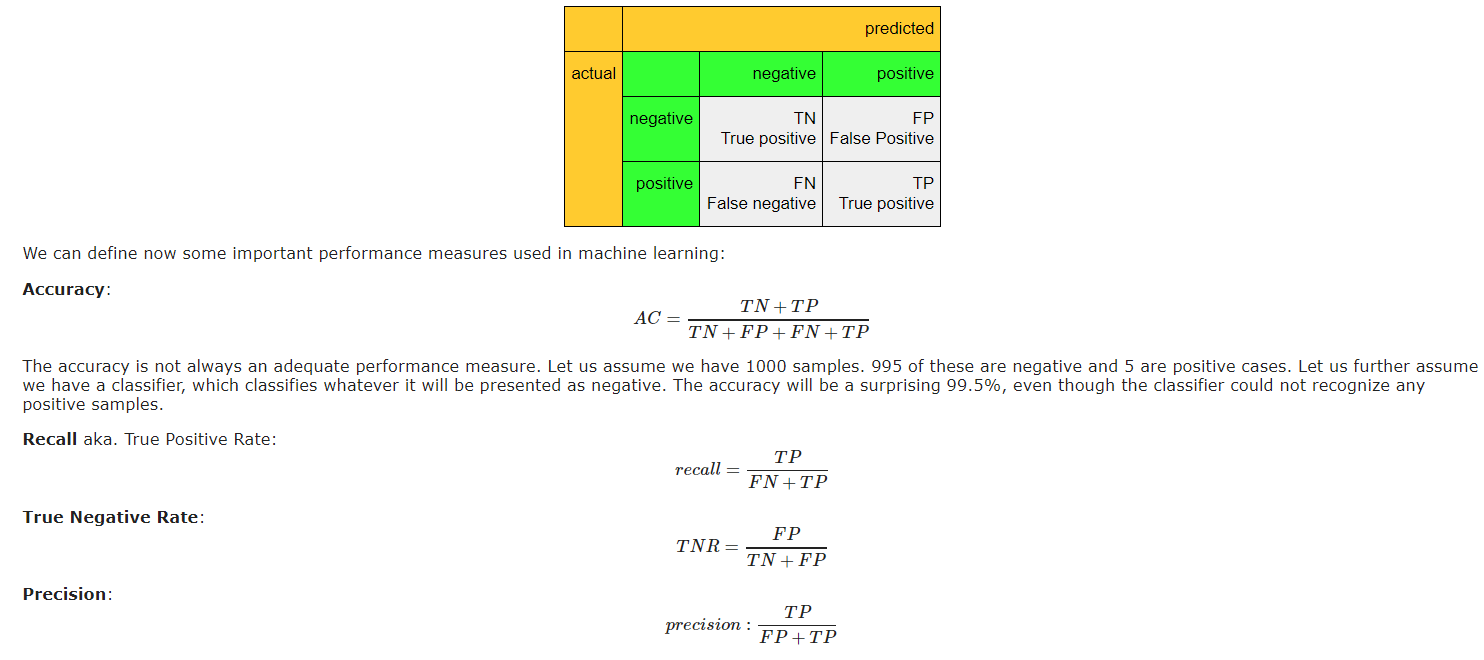

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1419  176]
 [ 135  270]]


0.8445

## Class Balancing  SMOTE
Confusion matrix without SMOTE: 

[[1419 176 

 [135   270]]
 
 with SMOTE:
 [[1437  158]
 
 [ 156  249]]



In [ ]:
#N   P
#[TN FP
# FN TP]

# With SMOTE
TP = 270 #True Positives
TN = 1419 #True Negatives
FP = 176 #False Positives
FN = 135 #False Negatives
#Accuracy
Accuracy = (TP + TN)/(TP + TN + FN + FP)
print('Accuracy',Accuracy)
#Precision
Precision = TP / (TP + FP)
print('Precision',Precision)
#Recall
Recall = TP / (TP + FN)
print('Recall', Recall)
#F1 Score
F1_Score = 2 * Precision * Recall / (Precision + Recall)
print('F1_Score',F1_Score)

Accuracy 0.8445
Precision 0.6053811659192825
Recall 0.6666666666666666
F1_Score 0.6345475910693301


Actual Not-Churn: 1554
Actual Churn: 405
The model will catch 80% of the customers who will actually churn.
The model will catch 73% of the customers who will actually Not churn
Overall all accuracy is 76%
Out of the customers it predicted as will churn, 67% of them will actually churn
Out of the customers it predicted as will Not churn, 73% of them will actually Not churn

In [ ]:
# without  SMOTE
TP = 84 #True Positives
TN = 1511 #True Negatives
FP = 204 #False Positives
FN = 204 #False Negatives
#Accuracy
Accuracy = (TP + TN)/(TP + TN + FN + FP)
print('Accuracy',Accuracy)
#Precision
Precision = TP / (TP + FP)
print('Precision',Precision)
#Recall
Recall = TP / (TP + FN)
print('Recall', Recall)
#F1 Score
F1_Score = 2 * Precision * Recall / (Precision + Recall)
print('F1_Score',F1_Score)

Accuracy 0.7963055416874688
Precision 0.2916666666666667
Recall 0.2916666666666667
F1_Score 0.2916666666666667


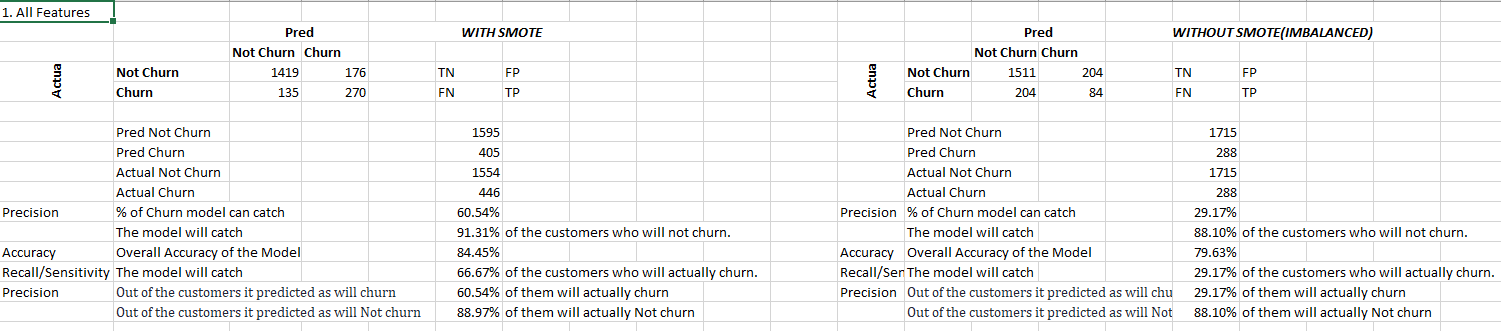

### Graphing the Evaluation Metrics (Conclusion)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = classifier.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

To make the plot looks more meaningful, let's train another binary classifier and compare it with our Keras classifier later in the same plot.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

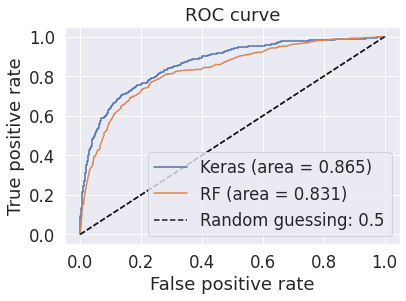

In [ ]:
#Now, let's plot the ROC for the two classifiers.
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


## Explore the option of feature eliminiation based on feature importance

In [ ]:
#Explore the accuracy by feature elimination of Geography and Gender
# since I had created bins etc in my EDA, I am reloading the original dataset to my dataframe to restart working on the model
data1 = data.copy()
data1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data1.drop(['Geography','Gender'], axis=1,inplace= True)


In [ ]:
X = data1.iloc[:, 0:-1].values
y = data1.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#normalize
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = Sequential()
#Adding the input layer and a hidden layer
# Hidden layer 1
classifier.add(Dense(units = 5, activation = 'relu', kernel_initializer='glorot_uniform',input_dim = 8))
#Adding second hidden layer
classifier.add(Dense(5, activation = 'relu', kernel_initializer='glorot_uniform',input_dim=5))
#Adding output layer
classifier.add(Dense(1, activation = 'sigmoid', kernel_initializer='glorot_uniform',input_dim=5))



In [ ]:

#Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 32, epochs = 100)

print(classifier.predict(sc.transform([[ 600, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

Epoch 1/100
8000/8000 [==============================] - 1s 98us/step - loss: 0.6949 - accuracy: 0.6094
Epoch 2/100
8000/8000 [==============================] - 1s 85us/step - loss: 0.5192 - accuracy: 0.7945
Epoch 3/100
8000/8000 [==============================] - 1s 82us/step - loss: 0.4626 - accuracy: 0.8020
Epoch 4/100
8000/8000 [==============================] - 1s 82us/step - loss: 0.4435 - accuracy: 0.8106
Epoch 5/100
8000/8000 [==============================] - 1s 82us/step - loss: 0.4369 - accuracy: 0.8104
Epoch 6/100
8000/8000 [==============================] - 1s 80us/step - loss: 0.4337 - accuracy: 0.8092
Epoch 7/100
8000/8000 [==============================] - 1s 82us/step - loss: 0.4304 - accuracy: 0.8104
Epoch 8/100
8000/8000 [==============================] - 1s 83us/step - loss: 0.4273 - accuracy: 0.8114
Epoch 9/100
8000/8000 [==============================] - 1s 87us/step - loss: 0.4244 - accuracy: 0.8119
Epoch 10/100
8000/8000 [==============================] - 1s 84u

0.8555

Without SMOTE: After deleting the Geography and Gender from the inputs to the model the confusion matrix and Accuracy score are: 
a. [[1546   49]
    [225  180]]

b. 0.863

With SMOTE:
[[1527   68]
 [ 214  191]]
0.8635

In [ ]:
#with SMOTE
TP = 217 #True Positives
TN = 1494 #True Negatives
FP = 101 #False Positives
FN = 188 #False Negatives
#Accuracy
Accuracy = (TP + TN)/(TP + TN + FN + FP)
print('Accuracy',Accuracy)
#Precision
Precision = TP / (TP + FP)
print('Precision',Precision)
#Recall
Recall = TP / (TP + FN)
print('Recall', Recall)
#F1 Score
F1_Score = 2 * Precision * Recall / (Precision + Recall)
print('F1_Score',F1_Score)

Accuracy 0.8555
Precision 0.6823899371069182
Recall 0.5358024691358024
F1_Score 0.6002766251728907


In [ ]:
#without SMOTE
TP = 225 #True Positives
TN = 1546 #True Negatives
FP = 180 #False Positives
FN = 49 #False Negatives
#Accuracy
Accuracy = (TP + TN)/(TP + TN + FN + FP)
print('Accuracy',Accuracy)
#Precision
Precision = TP / (TP + FP)
print('Precision',Precision)
#Recall
Recall = TP / (TP + FN)
print('Recall', Recall)
#F1 Score
F1_Score = 2 * Precision * Recall / (Precision + Recall)
print('F1_Score',F1_Score)

Accuracy 0.8855
Precision 0.5555555555555556
Recall 0.8211678832116789
F1_Score 0.662739322533137


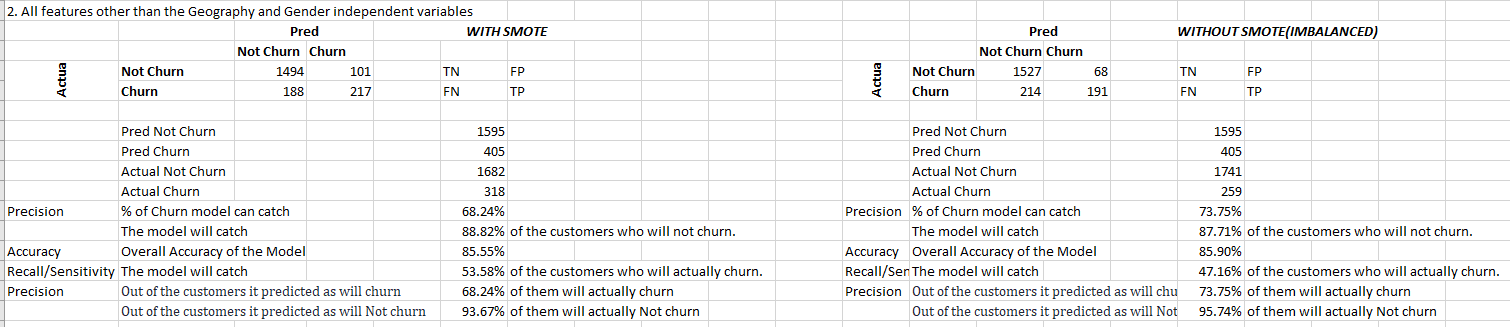

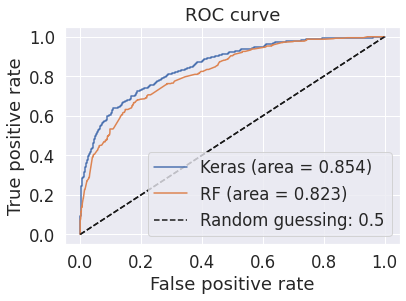

In [ ]:
y_pred_keras = classifier.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

#Now, let's plot the ROC for the two classifiers.
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
#Lets rerun the code after removing the other low importance features
data1.drop(['EstimatedSalary'], axis=1,inplace= True)


In [ ]:
X = data1.iloc[:, 0:-1].values
y = data1.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#normalize
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = Sequential()
#Adding the input layer and a hidden layer
# Hidden layer 1
classifier.add(Dense(units = 4, activation = 'relu', kernel_initializer='glorot_uniform',input_dim = 7))
#Adding second hidden layer
classifier.add(Dense(4, activation = 'relu', kernel_initializer='glorot_uniform',input_dim=4))
#Adding output layer
classifier.add(Dense(1, activation = 'sigmoid', kernel_initializer='glorot_uniform',input_dim=4))


#Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 32, epochs = 100)

print(classifier.predict(sc.transform([[ 600, 40, 3, 60000, 2, 1, 50000]])) > 0.5)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


Epoch 1/100
8000/8000 [==============================] - 1s 95us/step - loss: 0.6048 - accuracy: 0.7460
Epoch 2/100
8000/8000 [==============================] - 1s 84us/step - loss: 0.5084 - accuracy: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 83us/step - loss: 0.4745 - accuracy: 0.7964
Epoch 4/100
8000/8000 [==============================] - 1s 84us/step - loss: 0.4482 - accuracy: 0.8064
Epoch 5/100
8000/8000 [==============================] - 1s 84us/step - loss: 0.4298 - accuracy: 0.8136
Epoch 6/100
8000/8000 [==============================] - 1s 81us/step - loss: 0.4181 - accuracy: 0.8156
Epoch 7/100
8000/8000 [==============================] - 1s 85us/step - loss: 0.4084 - accuracy: 0.8160
Epoch 8/100
8000/8000 [==============================] - 1s 86us/step - loss: 0.4001 - accuracy: 0.8184
Epoch 9/100
8000/8000 [==============================] - 1s 83us/step - loss: 0.3927 - accuracy: 0.8189
Epoch 10/100
8000/8000 [==============================] - 1s 84u

0.8615

In [ ]:
# WITH SMOTE 
TP = 181
TN = 1542 #True Negatives
FP = 53 #False Positives
FN = 224  #False Negatives
#Accuracy
Accuracy = (TP + TN)/(TP + TN + FN + FP)
print('Accuracy',Accuracy)
#Precision
Precision = TP / (TP + FP)
print('Precision',Precision)
#Recall
Recall = TP / (TP + FN)
print('Recall', Recall)
#F1 Score
F1_Score = 2 * Precision * Recall / (Precision + Recall)
print('F1_Score',F1_Score)


Accuracy 0.8615
Precision 0.7735042735042735
Recall 0.4469135802469136
F1_Score 0.5665101721439749


In [ ]:
#No SMOTE
TP = 218 #True Positives
TN = 1538 #True Negatives
FP = 187 #False Positives
FN = 57 #False Negatives
#Accuracy
Accuracy = (TP + TN)/(TP + TN + FN + FP)
print('Accuracy',Accuracy)
#Precision
Precision = TP / (TP + FP)
print('Precision',Precision)
#Recall
Recall = TP / (TP + FN)
print('Recall', Recall)
#F1 Score
F1_Score = 2 * Precision * Recall / (Precision + Recall)
print('F1_Score',F1_Score)

Accuracy 0.878
Precision 0.5382716049382716
Recall 0.7927272727272727
F1_Score 0.6411764705882353


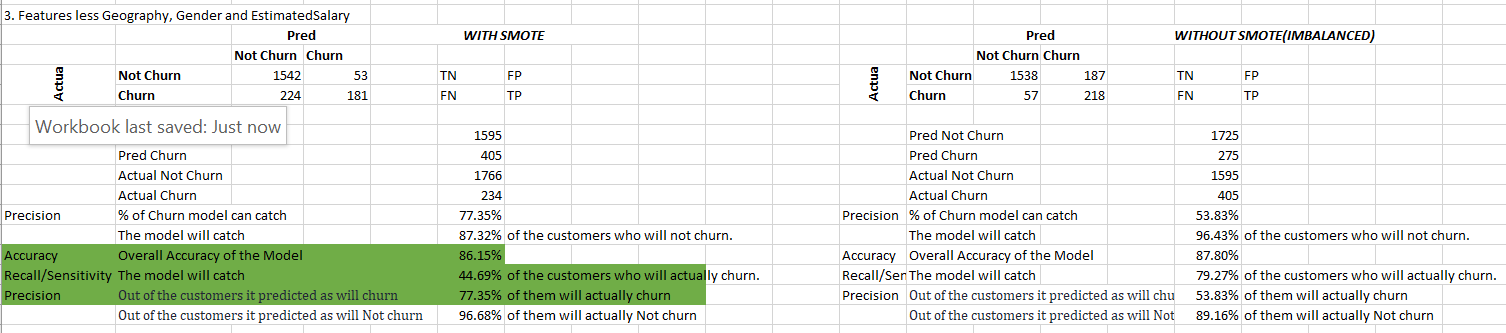

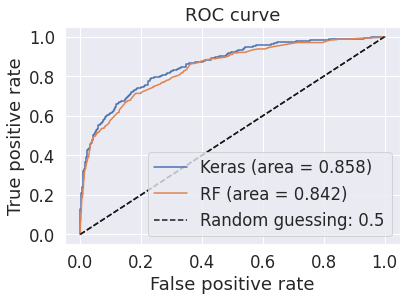

In [ ]:
y_pred_keras = classifier.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

#Now, let's plot the ROC for the two classifiers.
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Conclusion


In the above sections I have validated by excluding features with a low ranking in the feature importance and demonstrated that the accuracy does not improve. 

**Precision, Recall & Churn**

The most important measures for predicting Churn are Precision and Recall. 

Precision – Of all the users that the algorithm predicts will churn, how many of them do actually churn?

Recall – What percentage of users that end up churning does the algorithm successfully find?

Both precision and recall are important for evaluating the performance of a churn prediction algorithm.

After class balancing the dataset, the ANN model's predictions are:
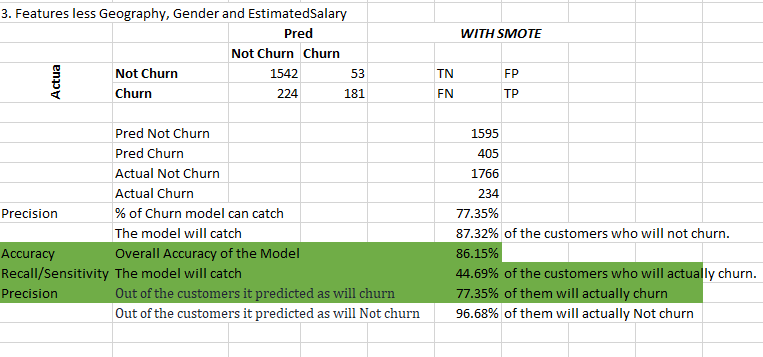 
